In [71]:
quit()

In [3]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

# Base Model
## Base model is only with amplitude detectors, no photo detectors

In [4]:
base = finesse.kat()
base.verbose=False
base.parse("""
# KAGRA DRFPMI model under development
#
# Keiko Kokeyama, 12th Aug, 2020
# 

# ======== Constants ========================
const f1 16.881M
const f2 45.0159M
const mf1 -16.881M
const mf2 -45.0159M
const a 0.686
const pi 3.1415

# ======== Input optics =====================
l i1 1 0 n0
s s_eo0 0 n0 n_eo1
mod eom1 $f1 0.3 1 pm n_eo1 n_eo2
s s_eo1 0 n_eo2 n_eo3
mod eom2 $f2 0.3 1 pm n_eo3 n_eo4
s s_eo2 0 n_eo4 nREFL

## ======= PRC each mirror loss 45ppm =======
# PRC
m1 PRM 0.1 45e-6 0 nREFL npr1
s sLpr1 14.7615 npr1 npr2
bs1 PR2 500e-6 45e-6 0 $a npr3 npr2 nPOP nPOP2
s sLpr2 11.0661 npr3 npr4
bs1 PR3 50e-6 45e-6 0 $a dump dump npr4 npr5
s sLpr3 15.7638 npr5 npr6

# Michelson
bs bs1 0.5 0.5 0 45 npr6 n2 n3 n4
s lx 26.6649 n3 nx1
s ly 23.3351 n2 ny1

# X arm
m ITMX 0.996 0.004 0 nx1 nx2
s sx1 3000 nx2 nx3
m ETMX 0.999995 5e-06 0 nx3 nTMSX

# Y arm
m ITMY 0.996 0.004 90 ny1 ny2
s sy1 3000 ny2 ny3
m ETMY 0.999995 5e-06 90 ny3 nTMSY


# ========= SRC each mirror loss 45ppm =======
s sLsr3 15.7396 n4 nsr5
bs1 SR3 50e-6 45e-6 0 $a nsr5 nsr4 dump dump
s sLsr2 11.1115 nsr4 nsr3
bs1 SR2 500e-6 45e-6 0 $a nsr2 nsr3 nPOS dump
s sLsr1 14.7412 nsr2 nsr1
m1 SRM 0.3 0e-6 0 nsr1 nAS

## ===== amplitude detectors =====

ad CR_POP 0 nPOP
ad SB1p_POP $f1 nPOP
ad SB1m_POP $mf1 nPOP
ad SB2p_POP $f2 nPOP
ad SB2m_POP $mf2 nPOP

ad CR_TMSX 0_TMSX nTMSX
ad SB1p_TMSX $f1 nTMSX
ad SB1m_TMSX $mf1 nTMSX
ad SB2p_TMSX $f2 nTMSX
ad SB2m_TMSX $mf2 nTMSX

ad CR_POS 0 nPOS
ad SB1p_POS $f1 nPOS
ad SB1m_POS $mf1 nPOS
ad SB2p_POS $f2 nPOS
ad SB2m_POS $mf2 nPOS

""")


# Field Check (POP, TMSX)

<function matplotlib.pyplot.show(*args, **kw)>

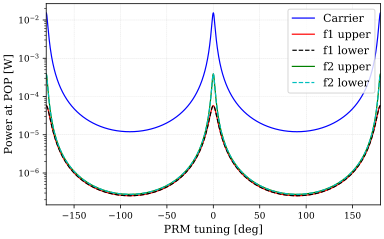

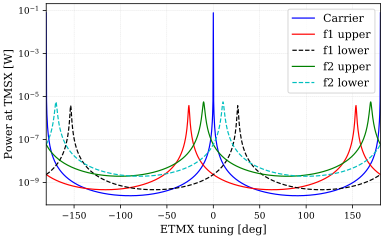

In [13]:
kat0 = base.deepcopy()
kat0.parse("""
xaxis* PRM phi lin -180 180 1000
""")

out = kat0.run()
plt.figure(1)
plt.semilogy(out.x, out["CR_POP"]**2,label="Carrier")
plt.semilogy(out.x, out["SB1p_POP"]**2,label="f1 upper")
plt.semilogy(out.x, out["SB1m_POP"]**2,label="f1 lower",LineStyle='--')
plt.semilogy(out.x, out["SB2p_POP"]**2,label="f2 upper")
plt.semilogy(out.x, out["SB2m_POP"]**2,label="f2 lower",LineStyle='--')
plt.xlabel("PRM tuning [deg]")
plt.ylabel("Power at POP [W]")
plt.legend(loc=1)
plt.show

kat1 = base.deepcopy()
kat1.parse("""
xaxis* ETMX phi lin -180 180 1000
""")

out1 = kat1.run()

plt.figure(2)
plt.semilogy(out.x, out1["CR_TMSX"]**2,label="Carrier")
plt.semilogy(out.x, out1["SB1p_TMSX"]**2,label="f1 upper")
plt.semilogy(out.x, out1["SB1m_TMSX"]**2,label="f1 lower",LineStyle='--')
plt.semilogy(out.x, out1["SB2p_TMSX"]**2,label="f2 upper")
plt.semilogy(out.x, out1["SB2m_TMSX"]**2,label="f2 lower",LineStyle='--')
plt.xlabel("ETMX tuning [deg]")
plt.ylabel("Power at TMSX [W]")
plt.legend(loc=1)
plt.show


# SRC tuning

<function matplotlib.pyplot.show(*args, **kw)>

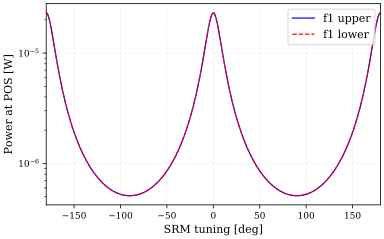

In [14]:
kats = base.deepcopy()
kats.parse("""
xaxis* SRM phi lin -180 180 1000
""")

out = kats.run()

plt.figure(1)
#plt.semilogy(out.x, out["CR_POS"]**2,label="Carrier") # CR => 0
plt.semilogy(out.x, out["SB1p_POS"]**2,label="f1 upper")
plt.semilogy(out.x, out["SB1m_POS"]**2,label="f1 lower",LineStyle='--')
#plt.semilogy(out.x, out["SB2p_POS"]**2,label="f2 upper")
#plt.semilogy(out.x, out["SB2m_POS"]**2,label="f2 lower",LineStyle='--')
plt.xlabel("SRM tuning [deg]")
plt.ylabel("Power at POS [W]")
plt.legend(loc=1)
plt.show

## Frequency Responses

### CARM
CARM has a pole.

<function matplotlib.pyplot.show(*args, **kw)>

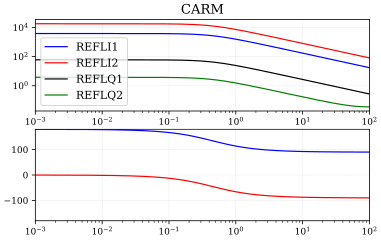

In [233]:
CARM = base.deepcopy()
CARM.parse("""
const fsb1 16.881M
const fsb2 45.0159M

fsig sig1 ETMX 10 0
fsig sig1 ETMY 10 0
xaxis sig1 f log .001 100 500

pd2 REFLI1 $fsb1 -0 10 nREFL
pd2 REFLQ1 $fsb1 90 10 nREFL
put REFLI1 f2 $x1
put REFLQ1 f2 $x1

pd2 REFLI2 $fsb2 -0.3 10 nREFL
pd2 REFLQ2 $fsb2 89.7 10 nREFL
put REFLI2 f2 $x1
put REFLQ2 f2 $x1

yaxis lin abs:deg

""")

out = CARM.run()

plt.subplot(2,1,1)
plt.loglog(out.x, np.abs(out["REFLI1"]),label="REFLI1")
plt.loglog(out.x, np.abs(out["REFLI2"]),label="REFLI2")
plt.loglog(out.x, np.abs(out["REFLQ1"]),label="REFLQ1")
plt.loglog(out.x, np.abs(out["REFLQ2"]),label="REFLQ2")
plt.xlim(0.001,100)
plt.title('CARM')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out.x, np.angle(out["REFLI1"])*180/np.pi,label="REFLI1")
plt.semilogx(out.x, np.angle(out["REFLI2"])*180/np.pi,label="REFLI2")
plt.ylim(-180,180)

plt.show

In [7]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out["REFLI1"][0]))
print('Gain at pole should be')
print(np.abs(out["REFLI1"][0])/np.sqrt(2))

print(np.abs(out["REFLI1"][264]))
print('Pole is at')
print(out.x[264])

Gain at DC is
3892.77149555314
Gain at pole should be
2752.6051221153234
2778.4741019583
Pole is at
0.436515832240166


### DARM

<function matplotlib.pyplot.show(*args, **kw)>

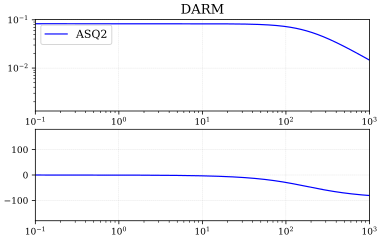

In [241]:
DARM = base.deepcopy()
DARM.parse("""
const fsb1 16.881M
const fsb2 45.0159M

fsig sig1 ETMX 10 0
fsig sig1 ETMY 10 180
xaxis sig1 f log .1 10000 1000

pd2 ASQ2 $fsb2 90 100 nAS
put ASQ2 f2 $x1

yaxis lin abs:deg

""")

out_darm = DARM.run()

plt.subplot(2,1,1)
plt.loglog(out_darm.x, np.abs(out_darm["ASQ2"]),label="ASQ2")
plt.xlim(0.1,1000)
plt.title('DARM')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_darm.x, np.angle(out_darm["ASQ2"])*180/np.pi,label="ASQ2")
plt.xlim(0.1,1000)
plt.ylim(-180,180)

plt.show

In [69]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out_darm["ASQ2"][0]))
print('Gain at pole should be')
print(np.abs(out_darm["ASQ2"][0])/np.sqrt(2))

print(np.abs(out_darm["ASQ2"][651]))
print('Pole is at')
print(out_darm.x[651])

Gain at DC is
0.082916066053766
Gain at pole should be
0.05863051257592963
0.0584946602511422
Pole is at
179.887091512879


### PRCL

PRCL has a set of zero-pole. The pole frequency should be compared with the analytical prediction. 

<function matplotlib.pyplot.show(*args, **kw)>

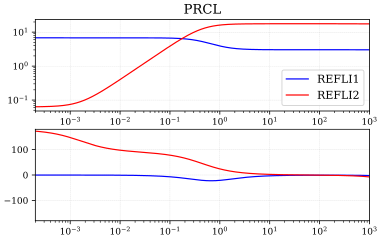

In [234]:
PRCL = base.deepcopy()
PRCL.parse("""
const fsb1 16.881M
const fsb2 45.0159M
fsig sig1 PRM 10 0
xaxis sig1 f log .0001 10000 5000

pd2 REFLI1 $fsb1 0 10 nREFL
pd2 REFLI2 $fsb2 0 10 nREFL

put REFLI1 f2 $x1
put REFLI2 f2 $x1

yaxis lin abs:deg
""")

out_prcl = PRCL.run()

plt.subplot(2,1,1)
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI1"]),label="REFLI1")
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI2"]),label="REFLI2")
plt.xlim(0.0002,1000)
plt.title('PRCL')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI1"])*180/np.pi,label="REFLI1")
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI2"])*180/np.pi,label="REFLI2")

plt.xlim(0.0002,1000)
plt.ylim(-180,180)

plt.show

In [235]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out_prcl["REFLI1"][0]))
print('Gain at pole should be')
print(np.abs(out_prcl["REFLI1"][0])/np.sqrt(2))

print(np.abs(out_prcl["REFLI1"][2350]))
print('Pole is at')
print(out_prcl.x[2350])

Gain at DC is
6.82067432845063
Gain at pole should be
4.822945069912441
4.81145882279157
Pole is at
0.575439937337158


In [236]:
### Searching zero...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI1"][5000]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI1"][5000])*np.sqrt(2))

print(np.abs(out_prcl["REFLI1"][2457]))
print('Zero is at')
print(out_prcl.x[2457])

Gain at High freq is
2.9309590313007194
Gain at zero should be
4.145002012825387
4.14242386425502
Zero is at
0.85349307161355


In [212]:
### Searching pole...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI2"][5000]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI2"][5000])/np.sqrt(2))

print(np.abs(out_prcl["REFLI2"][2220]))
print('Pole is at')
print(out_prcl.x[2220])

Gain at High freq is
15.6408368341119
Gain at zero should be
11.059741788832856
11.0654724934498
Pole is at
0.356451133426245


In [231]:
### Searching zero...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI2"][0]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI2"][0])*np.sqrt(2))

print(np.abs(out_prcl["REFLI2"][750]))
print('Zero is at')
print(out_prcl.x[750])

Gain at High freq is
0.062988244409885
Gain at zero should be
0.08907882951453067
0.0890310484128153
Zero is at
0.00158489319246112


## Demod phase tuning

### Mthod1 (ex PRCL)

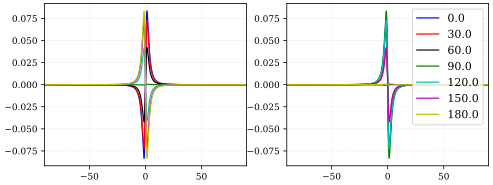

In [5]:
PRCL_sweep = base.deepcopy()
PRCL_sweep.parse("""
const fsb1 16.881M
const fsb2 45.0159M

var tuning 0
xaxis tuning phi lin -90 90 10000
put PRM phi $x1
yaxis lin abs

pd1 REFLI1 $fsb1 0 nREFL
pd1 REFLQ1 $fsb1 90 nREFL
pd1 POPI1 $fsb1 0 nPOP
pd1 POPQ1 $fsb1 90 nPOP
pd1 POSI1 $fsb1 0 nPOS
pd1 POSQ1 $fsb1 90 nPOS

pd1 ASI2 $fsb2 180 nAS
pd1 ASQ2 $fsb2 270 nAS
pd1 REFLI2 $fsb2 0 nREFL
pd1 REFLQ2 $fsb2 90 nREFL
pd1 POPI2 $fsb2 0 nPOP
pd1 POPQ2 $fsb2 90 nPOP
pd1 POSI2 $fsb2 0 nPOS
pd1 POSQ2 $fsb2 90 nPOS

""")

# Plot in different subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))

for pp in np.linspace(0,180,7):
    PRCL_sweep.REFLI1.phase1 = pp
    PRCL_sweep.REFLQ1.phase1 = pp+90
    PRCL = PRCL_sweep.run()
    ax1.plot(PRCL.x, PRCL["REFLI1"],label=pp)
    ax2.plot(PRCL.x, PRCL["REFLQ1"],label=pp)

plt.legend(loc=1)
plt.show()


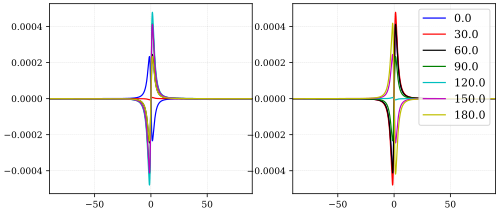

In [181]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3.5))

for pp in np.linspace(0,180,7):
    PRCL_sweep.POPI1.phase1 = pp
    PRCL_sweep.POPQ1.phase1 = pp+90
    PRCL = PRCL_sweep.run()
    ax1.plot(PRCL.x, PRCL["POPI1"],label=pp)
    ax2.plot(PRCL.x, PRCL["POPQ1"],label=pp)

plt.legend(loc=1)
plt.show()


## Method 2 

DARM
AS1


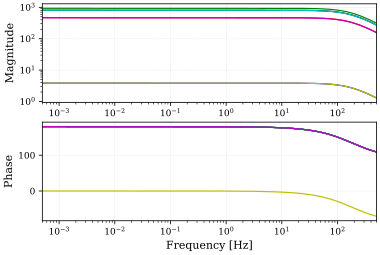

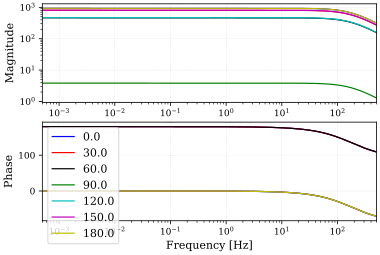

In [255]:
###### Run ######
DoF = "DARM"
sb = "1"
model,out = run_fsig(DoF)
sens = "AS"
################
sensI = sens+"I"+sb
sensQ = sens+"Q"+sb

# Plot in different subplot
fig1, (ax1, ax2) = plt.subplots(2,1,figsize=(6,4))
fig2, (ax3, ax4) = plt.subplots(2,1,figsize=(6,4))
for pp in np.linspace(0,180,7):
    setI = "model."+sensI+".phase1 = pp"
    setQ = "model."+sensQ+".phase1 = pp+90"
    exec(setI)
    exec(setQ)
    out = model.run()
    ax1.loglog(out.x, np.abs(out[sensI]),label=pp)
    ax2.semilogx(out.x, np.angle(out[sensI])*180/np.pi,label=pp)
    ax3.loglog(out.x, np.abs(out[sensQ]),label=pp)
    ax4.semilogx(out.x, np.angle(out[sensQ])*180/np.pi,label=pp)
    
plt.legend()
ax1.set(xlabel='Frequency [Hz]', ylabel='Magnitude')
ax2.set(xlabel='Frequency [Hz]', ylabel='Phase')
ax3.set(xlabel='Frequency [Hz]', ylabel='Magnitude')
ax4.set(xlabel='Frequency [Hz]', ylabel='Phase')
print(DoF)
print(sens+sb)
plt.show()



In [258]:
###### Run ######
DoF = "DARM"
model,out = run_fsig(DoF)
################

demod_REFL1 = demod_phase(out,"REFL","1",0)
demod_POP1 = demod_phase(out,'POP','1',0)
demod_POS1 = demod_phase(out,'POS','1',0)
demod_AS1 = demod_phase(out,'AS','1',0)
demod_AS2 = demod_phase(out,'AS','2',0)

print(demod_REFL1)
print(demod_POP1)
print(demod_POS1)
print(demod_AS1)

print(demod_AS2)



-67.4649955572757
-35.51556803148206
-35.57442463616329
56.740012240402244
-15.569054572190531


-15.569054572190531
0.08291365332374462


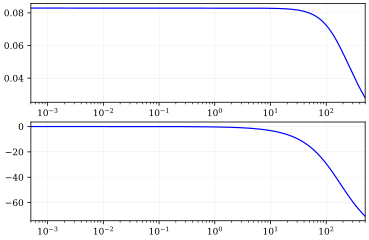

In [286]:
###### Run ######
DoF = "DARM"
sb = "2"
model,out = run_fsig(DoF)
sens = "AS"
################
sensI = sens+"I"+sb
sensQ = sens+"Q"+sb

out = model.run()
demod_AS2 = demod_phase(out,'AS','2',0)
print(demod_AS2)

# Plot in different subplot
fig1, (ax1, ax2) = plt.subplots(2,1,figsize=(6,4))

model.ASQ2.phase1 = 90
out = model.run()
ax1.semilogx(out.x, np.abs(out[sensQ]),label=pp)
ax2.semilogx(out.x, np.angle(out[sensQ])*180/np.pi,label=pp)

print(np.abs(out[sensQ])[0])

# Functions

## run_fsig

In [249]:
def run_fsig(DoF):
    model = base.deepcopy()
    model.parse("""
    const fsb1 16.881M
    const fsb2 45.0159M

    pd2 ASI1 $fsb1 0 10 nAS
    pd2 ASQ1 $fsb1 90 10 nAS
    pd2 REFLI1 $fsb1 0 10 nREFL
    pd2 REFLQ1 $fsb1 90 10 nREFL
    pd2 POPI1 $fsb1 0 10 nPOP
    pd2 POPQ1 $fsb1 90 10 nPOP
    pd2 POSI1 $fsb1 0 10 nPOS
    pd2 POSQ1 $fsb1 90 10 nPOS

    pd2 ASI2 $fsb2 0 10 nAS
    pd2 ASQ2 $fsb2 90 10 nAS
    pd2 REFLI2 $fsb2 0 10 nREFL
    pd2 REFLQ2 $fsb2 90 10 nREFL
    pd2 POPI2 $fsb2 0 10 nPOP
    pd2 POPQ2 $fsb2 90 10 nPOP
    pd2 POSI2 $fsb2 0 10 nPOS
    pd2 POSQ2 $fsb2 90 10 nPOS

    put ASI1 f2 $x1
    put ASQ1 f2 $x1
    put REFLI1 f2 $x1
    put REFLQ1 f2 $x1
    put POPI1 f2 $x1
    put POPQ1 f2 $x1
    put POSI1 f2 $x1
    put POSQ1 f2 $x1

    put ASI2 f2 $x1
    put ASQ2 f2 $x1
    put REFLI2 f2 $x1
    put REFLQ2 f2 $x1
    put POPI2 f2 $x1
    put POPQ2 f2 $x1
    put POSI2 f2 $x1
    put POSQ2 f2 $x1

    yaxis log abs:deg
    """)

###### choosing DoF ######

    if DoF == "CARM":
        model.parse("""
        const fstart 0.0005
        const fend 500
        fsig sig1 ETMX 10 0
        fsig sig1 ETMY 10 0
        xaxis sig1 f log $fstart $fend 1000
        """)
    elif DoF == "DARM":
        model.parse("""
        const fstart 0.0005
        const fend 500
        fsig sig1 ETMX 10 0
        fsig sig1 ETMY 10 180
        xaxis sig1 f log $fstart $fend 1000
        """)
    elif DoF == "MICH":
        model.parse("""
        const fstart 0.0005
        const fend 500
        fsig sig1 bs1 10 0
        xaxis sig1 f log $fstart $fend 1000
        """)
    elif DoF == "PRCL":
        model.parse("""
        const fstart 0.0005
        const fend 500
        fsig sig1 PRM 10 0
        xaxis sig1 f log $fstart $fend 1000
        """)    
    elif DoF == "SRCL":
        model.parse("""
        const fstart 0.0005
        const fend 500
        fsig sig1 SRM 10 0
        xaxis sig1 f log $fstart $fend 1000
        """)    
    else:
        print("Please specify a valid DoF")
    
    
    out = model.run()
    
    return model, out


In [250]:
def demod_phase(out, port, SB, N):
    # port and SB should be string
    # SB is 1 or 2 for f1 or f2
    # out is the output of model.run()
    # N has to be derived somehow
    sensI = port+"I"+SB
    sensQ = port+"Q"+SB
    I = np.sign(np.sin(np.angle(out[sensI][N])))* np.abs(out[sensI][N])
    Q = np.sign(np.sin(np.angle(out[sensQ][N])))* np.abs(out[sensQ][N])
    demod = np.tan(Q/I)*180/np.pi

    return demod

In [251]:
def run_sweep(DoF):

    model = base.deepcopy()
    model.parse("""
    const fsb1 16.881M
    const fsb2 45.0159M

    pd1 ASI1 $fsb1 0 nAS
    pd1 ASQ1 $fsb1 90 nAS
    pd1 REFLI1 $fsb1 0 nREFL
    pd1 REFLQ1 $fsb1 90 nREFL
    pd1 POPI1 $fsb1 0 nPOP
    pd1 POPQ1 $fsb1 90 nPOP
    pd1 POSI1 $fsb1 0 nPOS
    pd1 POSQ1 $fsb1 90 nPOS

    pd1 ASI2 $fsb2 0 nAS
    pd1 ASQ2 $fsb2 90 nAS
    pd1 REFLI2 $fsb2 0 nREFL
    pd1 REFLQ2 $fsb2 90 nREFL
    pd1 POPI2 $fsb2 0 nPOP
    pd1 POPQ2 $fsb2 90 nPOP
    pd1 POSI2 $fsb2 0 nPOS
    pd1 POSQ2 $fsb2 90 nPOS
    """)
    
    if DoF == "CARM":
        model.parse("""
        xaxis ETMX phi lin -90 90 5000
        put* ETMY phi $x1
        yaxis lin abs
        """)
    elif DoF == "DARM":
        model.parse("""
        xaxis ETMX phi lin -90 90 5000
        put* ETMY phi $mx1
        yaxis lin abs
        """)
    elif DoF == "MICH":
        model.parse("""
        var tuning 0
        xaxis tuning phi lin -90 90 5000
        put bs1 phi $x1
        yaxis lin abs
        """)
    elif DoF == "PRCL":
        model.parse("""
        var tuning 0
        xaxis tuning phi lin -90 90 5000
        put PRM phi $x1
        yaxis lin abs
        """)
    elif DoF == "SRCL":
        model.parse("""
        var tuning 0
        xaxis tuning phi lin -90 90 5000
        put SRM phi $x1
        yaxis lin abs
        """)
        
        
    out = model.run()
    return out


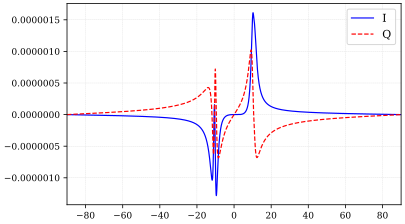

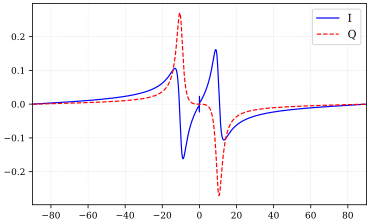

In [252]:

out = run_sweep("DARM")
plt.figure(1)
plt.plot(out.x,out["REFLI2"],label="I")
plt.plot(out.x,out["REFLQ2"],label="Q",linestyle="dashed")
plt.legend()

out2 = run_sweep("CARM")
plt.figure(2)
plt.plot(out2.x,out2["REFLI2"],label="I")
plt.plot(out2.x,out2["REFLQ2"],label="Q",linestyle="dashed")
plt.legend()
